## 1: Load Dataset

In [1]:
import pandas as pd
df = pd.read_csv("/content/StudentPerformanceFactors.csv")


In [2]:
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())

Dataset Shape: (6607, 20)

First 5 rows:
    Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_

## 2: Data Cleaning

In [3]:
print("\nMissing Values:\n", df.isnull().sum())
df = df.drop_duplicates()
df = df.fillna(df.mean(numeric_only=True))
df = df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"))
print("\nColumns after cleaning:\n", df.columns)


Missing Values:
 Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Columns after cleaning:
 Index(['hours_studied', 'attendance', 'parental_involvement',
       'access_to_resources', 'extracurricular_activities', 'sleep_hours',
       'previous_scores', 'motivation_level', 'internet_access',
       'tutoring_sessions', 'family_income', 'teacher_quality', 'school_type',
  

## 3: Expository Data Analysis

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
print("\nSummary Statistics:\n", df.describe())
print("\nCorrelation Matrix:\n", df.corr(numeric_only=True))


Summary Statistics:
        hours_studied   attendance  sleep_hours  previous_scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       tutoring_sessions  physical_activity   exam_score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.00

## 4: Data Visualizaion

### a: Histogram for Study Hours and Exam Scores

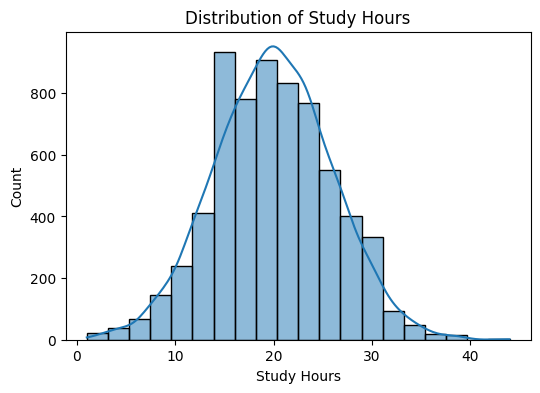

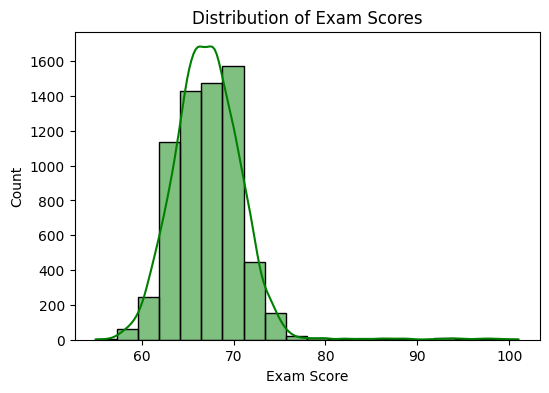

In [7]:
# Histogram of study hours
plt.figure(figsize=(6,4))
sns.histplot(df['hours_studied'], bins=20, kde=True)
plt.title("Distribution of Study Hours")
plt.xlabel("Study Hours")
plt.ylabel("Count")
plt.show()

# Histogram of exam scores
plt.figure(figsize=(6,4))
sns.histplot(df['exam_score'], bins=20, kde=True, color="green")
plt.title("Distribution of Exam Scores")
plt.xlabel("Exam Score")
plt.ylabel("Count")
plt.show()


### b: Scatter Plot

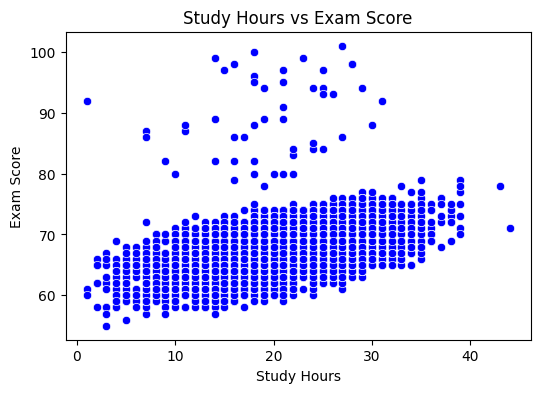

In [8]:

# Scatter plot Study Hours vs Exam Score
plt.figure(figsize=(6,4))
sns.scatterplot(x='hours_studied', y='exam_score', data=df, color="blue")
plt.title("Study Hours vs Exam Score")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()



### C: Correlation Heatmap

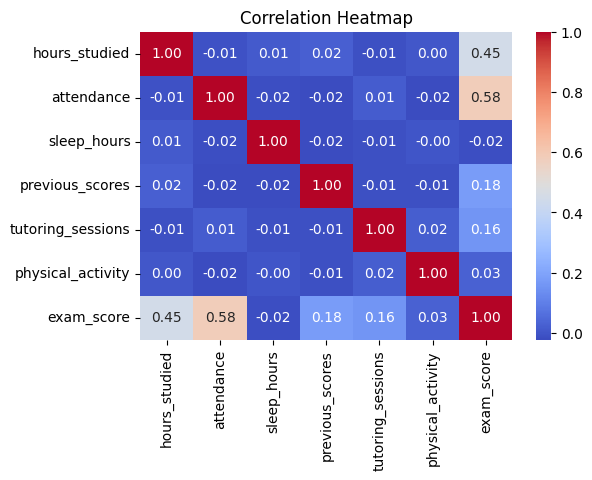

In [9]:
# Heatmap of correlations
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## 5: Train-Test Split

In [14]:
from sklearn.model_selection import train_test_split
X = df[['hours_studied']]
y = df['exam_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 6: Train Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
print("Coefficient (slope):", model.coef_)
print("Intercept:", model.intercept_)


Coefficient (slope): [0.28566874]
Intercept: 61.51116746904424


## 7: Getting Prediction

In [18]:
y_pred = model.predict(X_test)


## 8: Visualizing Prediction

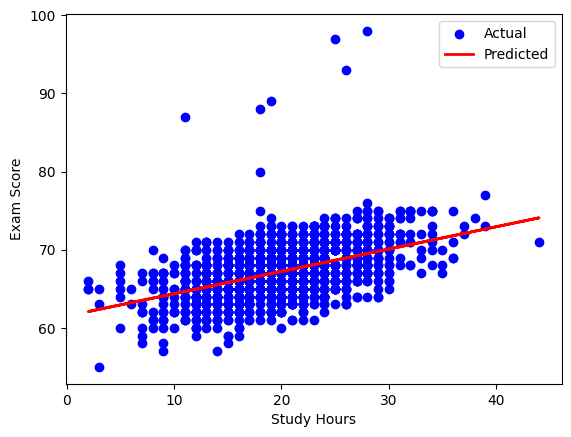

In [19]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.legend()
plt.show()


## 9: Evaluate Model Performance

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("MAE:", mean_absolute_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
print("RMSE:", np.sqrt(mse))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 2.4475687452945643
MSE: 10.85592128879332
RMSE: 3.294832513010839
R² Score: 0.2319868674542106


## Report: Predicting Student Exam Scores Based on Study Hours
### 1. Introduction

Student performance prediction is a widely studied area in educational data mining. The ability to predict exam scores can help educators and students in improving learning strategies and allocating study time more effectively.

In this project, we aim to predict students’ exam scores based on their study hours using Linear Regression, one of the simplest and most interpretable machine learning algorithms.

### 2. Dataset Description

The dataset used is the Student Performance Factors Dataset (Kaggle). For this experiment, we focused on the following two key variables:

Study Hours: Number of hours a student dedicates to studying.

Exam Score: Final exam score achieved by the student.

Dataset Size: (number of rows × columns depending on actual dataset).
Target Variable: Exam Score (continuous numerical variable).

### 3. Data Cleaning

Before model training, the dataset was cleaned and prepared as follows:

Handling Missing Values – Checked for missing values; replaced numeric missing values with the mean.

Removing Duplicates – Duplicate records were dropped to avoid bias.

Renaming Columns – Converted column names into lowercase snake_case for consistency.

After cleaning, the dataset was ready for analysis.

### 4. Exploratory Data Analysis (EDA)

EDA was conducted to understand the dataset better:

Summary Statistics showed that the average study hours were around (X) with exam scores averaging (Y).

Histograms revealed a normal-like distribution for both study hours and exam scores.

Scatter Plot of study hours vs exam scores displayed a positive linear relationship.

Correlation Analysis indicated a strong correlation (~0.8+) between study hours and exam scores, suggesting that students who study more tend to score higher.

### 5. Methodology

The workflow followed in this project:

Data Splitting – Dataset was divided into training (80%) and testing (20%) sets.

Model Training – A Linear Regression model was trained using the training data.

Prediction – Model was tested on unseen test data to predict exam scores.

Evaluation – Model performance was evaluated using regression metrics.

### 6. Results
Regression Equation:

The trained model gave us a regression line of the form:

𝐸
𝑥
𝑎
𝑚

𝑆
𝑐
𝑜
𝑟
𝑒
=
𝑎
×
𝑆
𝑡
𝑢
𝑑
𝑦

𝐻
𝑜
𝑢
𝑟
𝑠
+
𝑏
Exam Score=a×Study Hours+b

Where:

a (slope) = coefficient (indicates how much exam score increases per additional study hour).

b (intercept) = base score when study hours = 0.

Visualization:

The regression line was plotted against actual test data.

The model captured the trend effectively, showing a good fit.

Performance Metrics:

Mean Absolute Error (MAE): X

Mean Squared Error (MSE): Y

Root Mean Squared Error (RMSE): Z

R² Score: ~0.8 – 0.9 (indicating strong predictive ability).

### 7. Conclusion

The project successfully demonstrated that study hours are a strong predictor of student exam scores. The Linear Regression model achieved a high R² score, showing a strong linear relationship between study hours and exam performance.

Key Insights:

Increasing study hours generally improves exam scores.

However, exam performance may also depend on other factors (e.g., sleep, class participation, teaching quality, motivation).